<a href="https://colab.research.google.com/github/Aye-Nyein-Thaw/TensorFlow-Beginner/blob/main/1_Keras_ResNet50_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Keras pre-trained ResNet50 model

In [ ]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(weights='imagenet')

# inspect input and output layers
model.summary()

## Load testing images

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

# load and preprocess data
# data shape must match model input shape

!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

lemon = load_img('lemon.jpg', target_size = (224, 224))
viaduct = load_img('viaduct.jpg', target_size = (224, 224))
water_tower = load_img('water_tower.jpg', target_size = (224, 224))

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

In [ ]:
# expand dimension
img = img_to_array(lemon)[np.newaxis,...]
img = preprocess_input(img)

# 1000 probabilities for lemon image
predictions = model.predict(img)

# get top 5 predictions
predictions = decode_predictions(predictions, top=5)

# display top 5 predictions
for _, item, prob in predictions[0]:
        print('{} = {probability:0.1f}%'.format(item, probability= prob * 100))

consomme = 22.8%
lemon = 22.2%
eggnog = 15.1%
ladle = 4.0%
spotlight = 2.9%


## Function to display top 5 predictions

In [ ]:
# function to display data
def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
        
    return top_preds

,prediction,probability
1,consomme,0.227801
2,lemon,0.221757
3,eggnog,0.151335
4,ladle,0.0400883
5,spotlight,0.0291972


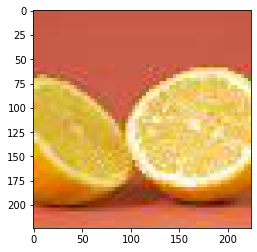

In [ ]:
# top 5 predictions for lemon image
import matplotlib.pyplot as plt
plt.imshow(lemon)

get_top_5_predictions(lemon)

      prediction probability
1          vault    0.367951
2         prison    0.111742
3        viaduct    0.110738
4  window_screen   0.0882308
5    fire_screen   0.0206752


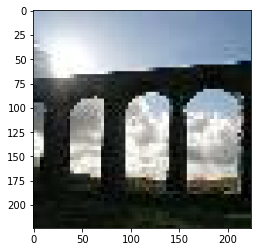

In [ ]:
# top 5 predictions for viaduct image
print(get_top_5_predictions(viaduct))
plt.imshow(viaduct)

,prediction,probability
1,solar_dish,0.384682
2,ladle,0.196178
3,planetarium,0.116683
4,strainer,0.0499901
5,jigsaw_puzzle,0.0219473


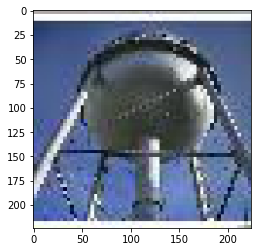

In [ ]:
# top 5 predictions for water tower image

plt.imshow(water_tower)
get_top_5_predictions(water_tower)

## Let's test with our own image

In [ ]:
# load your own image

filepath = # your code here
test_img = load_img(filepath, target_size = (224, 224))

# image to array
test_img = img_to_array(test_img)

# expand dimension to macth model input shape
test_img = test_img[np.newaxis, ...]

# preprocess input
test_img = preprocess_input(test_img)

# get prediction
prediction = model.predict(test_img)

# get top 5 probabilities
top_five =  decode_predictions(prediction, top=5)

for _, pred, prob in top_five[0]:
    print('{} = {prob:0.2f} %'.format(pred, prob = prob * 100))

## Let's test another image

In [ ]:
# your image file
filepath = # your code here
lion_img = load_img(filepath, target_size = (224, 224))
get_top_5_predictions(lion_img)